In [1]:
##importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPooling2D
from keras import backend as k
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
##importing the dataset
dataset_train = pd.read_csv('fashion-mnist_train.csv',sep=',')
dataset_test = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [5]:
##Pre-processing the training and testing data
X_train = dataset_train.iloc[:,1:].values
x_test = dataset_test.iloc[:,1:].values
y_train = dataset_train.iloc[:,0].values
y_test = dataset_test.iloc[:,0].values

X_train = np.float32(X_train)
X_train /= 255
x_test = np.float32(x_test)
x_test /= 255



In [6]:
##splitting training set into training and evaluation set
from sklearn.model_selection import train_test_split
X_train,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)



##Reshaping the training set
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))
x_val = x_val.reshape(x_val.shape[0],*(28,28,1))

In [7]:
##getting the shape of the image
img_rows = X_train[0].shape[0]
img_col = X_train[0].shape[1]
input_shape = (img_rows,img_col,1)




##Developing the model
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))
          
          
          
##compiling the  model
model.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001), metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_8 (Dense)              (None, 48000)             1584000   
Total params: 1,930,784
Trainable params: 1,930,784
Non-trainable params: 0
_________________________________________________________________


In [8]:
##Training and validating the model 
model.fit(X_train,y_train,epochs=50,batch_size=512,verbose=1,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 94s 2ms/step - loss: 0.7477 - acc: 0.7464 - val_loss: 0.4598 - val_acc: 0.8386
Epoch 2/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.4249 - acc: 0.8496 - val_loss: 0.3922 - val_acc: 0.8648
Epoch 3/50
48000/48000 [==============================] - 101s 2ms/step - loss: 0.3739 - acc: 0.8699 - val_loss: 0.3535 - val_acc: 0.8756
Epoch 4/50
48000/48000 [==============================] - 101s 2ms/step - loss: 0.3512 - acc: 0.8766 - val_loss: 0.3364 - val_acc: 0.8834
Epoch 5/50
48000/48000 [==============================] - 104s 2ms/step - loss: 0.3208 - acc: 0.8880 - val_loss: 0.3155 - val_acc: 0.8901
Epoch 6/50
48000/48000 [==============================] - 113s 2ms/step - loss: 0.3082 - acc: 0.8936 - val_loss: 0.3095 - val_acc: 0.8912
Epoch 7/50
48000/48000 [==============================] - 104s 2ms/step - lo

In [9]:
##checking test accuracy
evaluate = model.evaluate(x_test,y_test)
print(f'Test accuracy : {evaluate[1]:.3f}')

10000/10000 [==============================] - 12s 1ms/step
Test accuracy : 0.915


In [10]:
##getting predicted classes
predicted_classes = model.predict_classes(x_test)

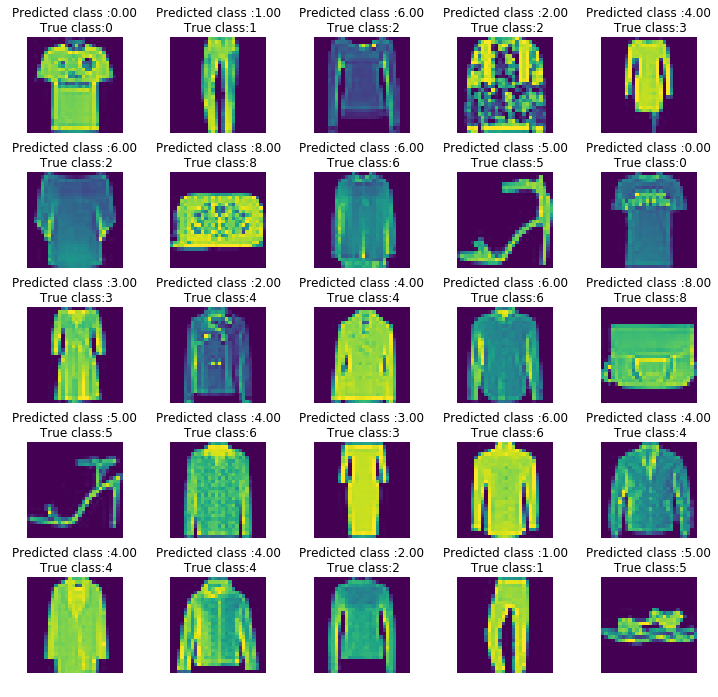

In [12]:
##comparing the true label vs predicted label
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,(L*W)):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f'Predicted class :{predicted_classes[i]:.2f}\n True class:{y_test[i]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

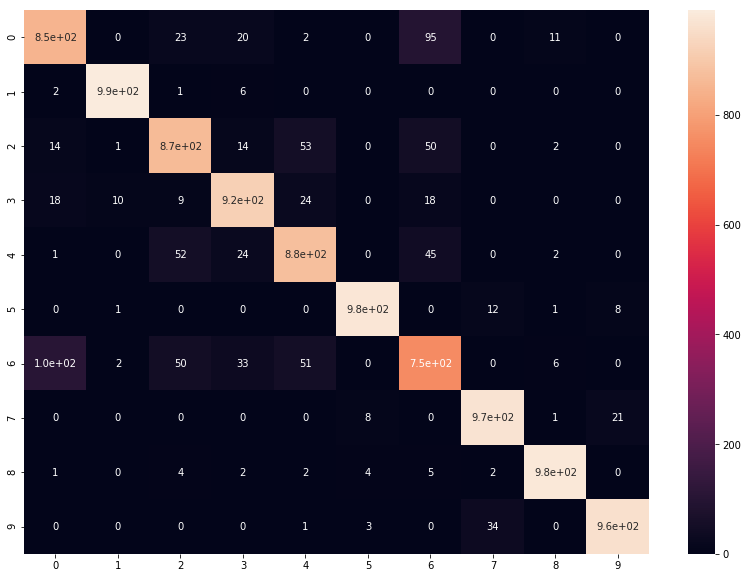

In [13]:
##displaying the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [16]:
##Class level performance
from sklearn.metrics import classification_report
num_classes = 10
target_names = [f'Class:{i}' for i in range(num_classes)]
print(classification_report(y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class:0       0.86      0.85      0.85      1000
     Class:1       0.99      0.99      0.99      1000
     Class:2       0.86      0.87      0.86      1000
     Class:3       0.90      0.92      0.91      1000
     Class:4       0.87      0.88      0.87      1000
     Class:5       0.98      0.98      0.98      1000
     Class:6       0.78      0.75      0.77      1000
     Class:7       0.95      0.97      0.96      1000
     Class:8       0.98      0.98      0.98      1000
     Class:9       0.97      0.96      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

